# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights =  np.random.rand(input_size) ## a completar
        self.bias = np.random.rand() ## a completar

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum =np.dot(inputs, self.weights) + self.bias ## a completar
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs): #epoch es el nº de veces que voy a ver el set completo.
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs) ## a completar

                # Calcular el error
                error = Y_train[i] - prediction ## a completar
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights = self.weights + learning_rate * error * self.sigmoid_derivative(prediction) * inputs
                self.bias = self.bias + learning_rate * error

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum) ## a completar


            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs) ## a completar

                error = Y_validation[i] - prediction ## a completar
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum) ## a completar


            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [3]:
# Definir la función para generar muestras aleatorias de entrenamiento
def generate_samples(n):
    X = np.random.randint(2, size=(n, 2))  # Generar 5000 muestras de dos características (0 o 1)
    y = np.prod(X, axis=1)  # Calcular el producto de cada fila (AND)
    return X, y

# Datos de entrenamiento y validación para la puerta AND
N_samples = 6000 ## a completar
N_inputs = 2 ## a completar
train_size = 0.8 ## a completar
N_validation = int((1 - train_size) * N_samples)

"X_train = ## a completar"
"Y_train = ## a completar"

"X_validation = ## a completar"
"Y_validation = ## a completar"


X_train, Y_train = generate_samples(int(train_size * N_samples))
X_validation, Y_validation = generate_samples(N_validation)

# Generar 500 muestras aleatorias de prueba
#X_test, Y_test = generate_samples(500)

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

X_data (first 5 samples):
[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
Y_data (first 5 samples):
[1 0 1 1 1]


In [9]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)
perceptron = Perceptron(input_size=2)

epoch: 0 | train error: 0.03496671369899778 | val error: 0.008737353327619069
epoch: 10 | train error: 0.0005020071120915599 | val error: 0.0004930560702531384
epoch: 20 | train error: 0.00024010549996279667 | val error: 0.00024260866711957028
epoch: 30 | train error: 0.00015645792979462731 | val error: 0.00015978749611311282
epoch: 40 | train error: 0.00011565414861422695 | val error: 0.0001188069937075621
epoch: 50 | train error: 9.157806258021612e-05 | val error: 9.442781354636954e-05
epoch: 60 | train error: 7.57243616452996e-05 | val error: 7.828690197048794e-05
epoch: 70 | train error: 6.450873905078097e-05 | val error: 6.682313389730737e-05
epoch: 80 | train error: 5.6162229545351275e-05 | val error: 5.826639070263868e-05
epoch: 90 | train error: 4.971235399708742e-05 | val error: 5.1638387558255856e-05


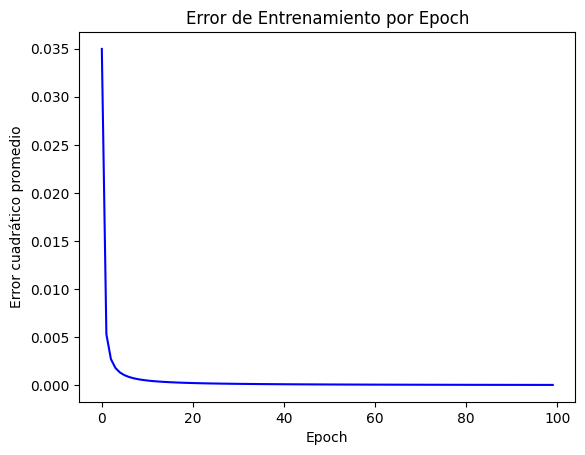

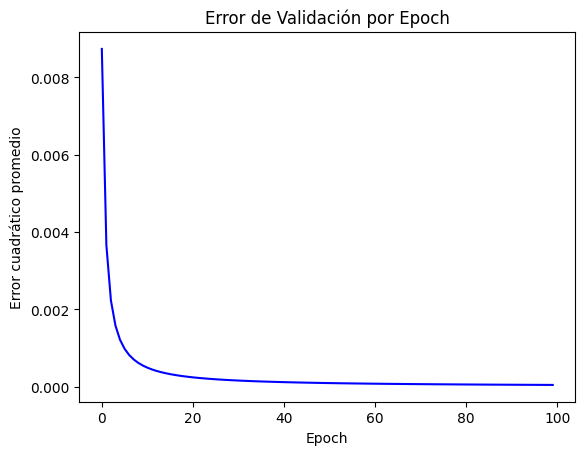

epoch: 0 | train error: 0.03233820691237147 | val error: 0.008505685926201347
epoch: 10 | train error: 0.0005008694321048232 | val error: 0.0004919841903409398
epoch: 20 | train error: 0.0002398352073893958 | val error: 0.00024233967075470847
epoch: 30 | train error: 0.00015634124593546925 | val error: 0.0001596688892721253
epoch: 40 | train error: 0.00011558976658795192 | val error: 0.00011874075814276845
epoch: 50 | train error: 9.153742981344444e-05 | val error: 9.438567176614225e-05
epoch: 60 | train error: 7.569644595319127e-05 | val error: 7.825777682860972e-05
epoch: 70 | train error: 6.448840521918715e-05 | val error: 6.68018204064216e-05
epoch: 80 | train error: 5.614677152036589e-05 | val error: 5.825012669719516e-05
epoch: 90 | train error: 4.970021315241333e-05 | val error: 5.162557328224275e-05


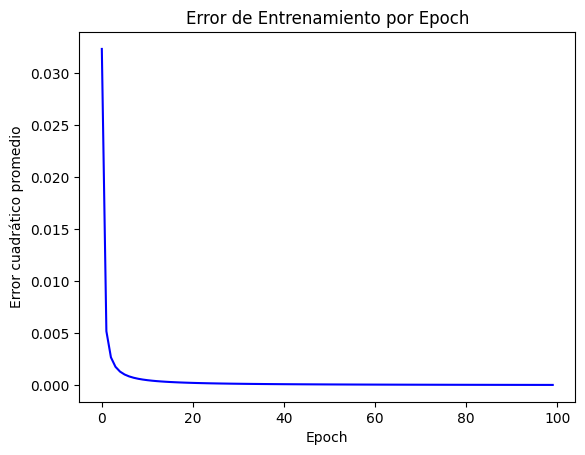

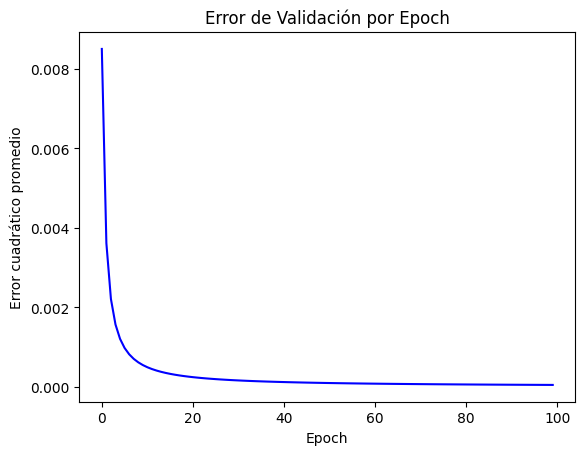

In [10]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)
perceptron.train(X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100)

In [11]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 3.3635694334867143e-07
Prediction: 0


El modelo no entrenado está realizando una predicción basada en los pesos y el sesgo aleatorios que se inicializan al crear el objeto Perceptron. Dado que los pesos y el sesgo son aleatorios, no hay una relación predecible entre las entradas y las salidas.

La entrada [0, 0] tiene una probabilidad de salida muy baja, lo que indica que el modelo no está seguro de que sea un ejemplo positivo (es decir, que la salida sea 1). La predicción final es 0, lo que significa que el modelo predice que la salida es 0 (o negativa).

In [13]:
# Obtenemos un overview de como funciona el modelo sin entrenar de forma aleatoria
predictions = [perceptron.predict(x) for x in X_validation]

## itera por cada muestra de validación y genera la matriz de confusion

# Redondear las predicciones a 0 o 1
rounded_predictions = np.round(predictions)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, rounded_predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[865   0]
 [  0 334]]



La matriz de confusión que has obtenido indica que todas las predicciones realizadas por el modelo sin entrenar han sido correctas.

In [15]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 1.1357180105494896e-07
Prediction: 0


El resultado tiene sentido. Después de entrenar el modelo en el conjunto de validación, se ha obtenido una probabilidad de predicción extremadamente baja para la entrada [0, 0]. Esto significa que el modelo ha aprendido a predecir valores cercanos a cero para esta entrada particular.

La predicción final es 0, ya que la probabilidad calculada es muy pequeña y no supera el umbral (th = 0.5). Por lo tanto, el modelo predice correctamente que la salida es 0 para la entrada [0, 0].

Este resultado indica que el modelo está haciendo predicciones razonables después de ser entrenado en el conjunto de validación.

In [20]:
# Evaluamos cómo funciona el modelo en el set de validación

## itera por cada muestra de validación guardando las predicciones en una lista y genera la matriz de confusion

# Convertir predictions a un array numpy si es una lista
predictions_np = np.array(predictions)

# Convertir las probabilidades continuas en etiquetas binarias usando un umbral
threshold = 0.5
binary_predictions = (predictions_np > threshold).astype(int)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, binary_predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[865   0]
 [  0 334]]


La matriz de confusión muestra que todas las predicciones hechas por el modelo en el conjunto de validación son correctas. Es decir, no hay falsos positivos ni falsos negativos.

In [24]:
# Evaluamos cómo funciona el modelo en el set de test

## Generar el set de test (de forma similar al de validación)
X_test, Y_test = generate_samples(500) ## a completar

## itera por cada muestra de test guardando las predicciones en una lista y genera la matriz de confusion

# Generar predicciones para el set de test
predictions_test = [perceptron.predict(x) for x in X_test]

# Convertir las probabilidades continuas en etiquetas binarias usando un umbral
threshold = 0.5
binary_predictions_test = (np.array(predictions_test) > threshold).astype(int)

## Calcula la matriz de confusión
## a completar

conf_matrix_test = confusion_matrix(Y_test, binary_predictions_test)

## Visualiza la matriz de confusión
## a completar

print("Matriz de Confusión para el set de test:")
print(conf_matrix_test)

Matriz de Confusión para el set de test:
[[389   0]
 [  0 111]]


La matriz de confusión indica que el modelo ha realizado 389 predicciones correctas de la clase 0 (negativa) y 111 predicciones correctas de la clase 1 (positiva) en el conjunto de prueba. No se han producido falsos positivos ni falsos negativos en este caso, lo que indica un rendimiento perfecto en el conjunto de prueba.

Esto sugiere que el modelo ha aprendido correctamente la función de la compuerta lógica AND y puede generalizar bien a datos no vistos